# Demonstrate LR range test

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


### Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
classModel = 'modelRelu'

nSplits = 5
patience = 100
maxEpochs = 5

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


### Import data

In [4]:
trainData = BatchYielder(h5py.File(dirLoc + 'train.hdf5', "r+"))

#  Manually test different LRs

Training using weights
Running fold 1 / 5
2 classes found, running in binary mode

Score is: {'loss': 4.610744225228662e-05, 'wAUC': 0.125364217663551, 'AUC': 0.21060728418252495, 'AMS': 2.062433036992097, 'cut': 0.6439013481140137}
Fold took 16.311s

Running fold 2 / 5
Score is: {'loss': 4.8930575628453094e-05, 'wAUC': 0.1437469168749581, 'AUC': 0.23471103954414319, 'AMS': 1.8329348079599963, 'cut': 0.5661016702651978}
Fold took 16.612s

Running fold 3 / 5
Score is: {'loss': 4.547538093829102e-05, 'wAUC': 0.13019097548299974, 'AUC': 0.22243728207650204, 'AMS': 1.9406505169193826, 'cut': 0.6510763168334961}
Fold took 21.226s

Running fold 4 / 5
Score is: {'loss': 4.6530514289042915e-05, 'wAUC': 0.13001004955535667, 'AUC': 0.2228772532958364, 'AMS': 1.9716099879539377, 'cut': 0.6806350350379944}
Fold took 19.946s

Running fold 5 / 5
Score is: {'loss': 4.469500915438402e-05, 'wAUC': 0.12220779700032836, 'AUC': 0.22257261533095019, 'AMS': 2.042698242050673, 'cut': 0.6658825874328613}
Fold

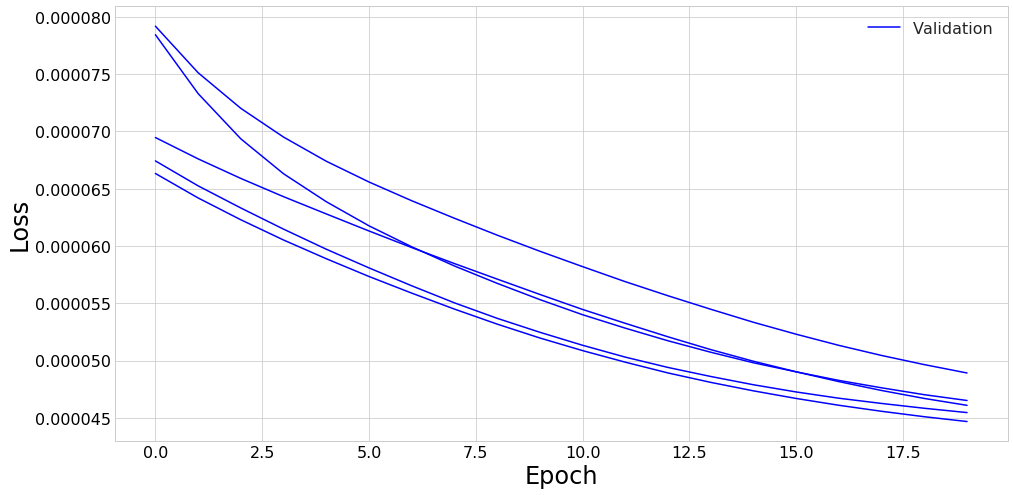

Mean loss = 4.63e-05 +- 6e-07
Mean wAUC = 0.13 +- 0.003
Mean AUC = 0.223 +- 0.003
Mean AMS = 1.97 +- 0.04
Mean cut = 0.64 +- 0.02
______________________________________



In [5]:
results1, histories1 = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':1e-5}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          patience=patience, verbose=0, amsSize=250000)

Training using weights
Running fold 1 / 5
2 classes found, running in binary mode

Score is: {'loss': 3.4450969207166615e-05, 'wAUC': 0.07340466772165977, 'AUC': 0.11520551690910641, 'AMS': 3.495197019743864, 'cut': 0.9437678456306458}
Fold took 15.310s

Running fold 2 / 5
Score is: {'loss': 3.386686853404373e-05, 'wAUC': 0.0721312020860696, 'AUC': 0.12081883841625485, 'AMS': 3.2824004635805872, 'cut': 0.9712451100349426}
Fold took 16.200s

Running fold 3 / 5
Score is: {'loss': 3.4594653815601175e-05, 'wAUC': 0.07492810902729763, 'AUC': 0.11753555729223841, 'AMS': 3.1021210151686716, 'cut': 0.9410990476608276}
Fold took 15.413s

Running fold 4 / 5
Score is: {'loss': 3.3362497510097454e-05, 'wAUC': 0.06970323079340668, 'AUC': 0.11481581606079727, 'AMS': 3.255664563319397, 'cut': 0.937390923500061}
Fold took 17.672s

Running fold 5 / 5
Score is: {'loss': 3.4001761869876643e-05, 'wAUC': 0.07220889332909941, 'AUC': 0.12078125924592531, 'AMS': 3.1840473625060115, 'cut': 0.9201837182044983}


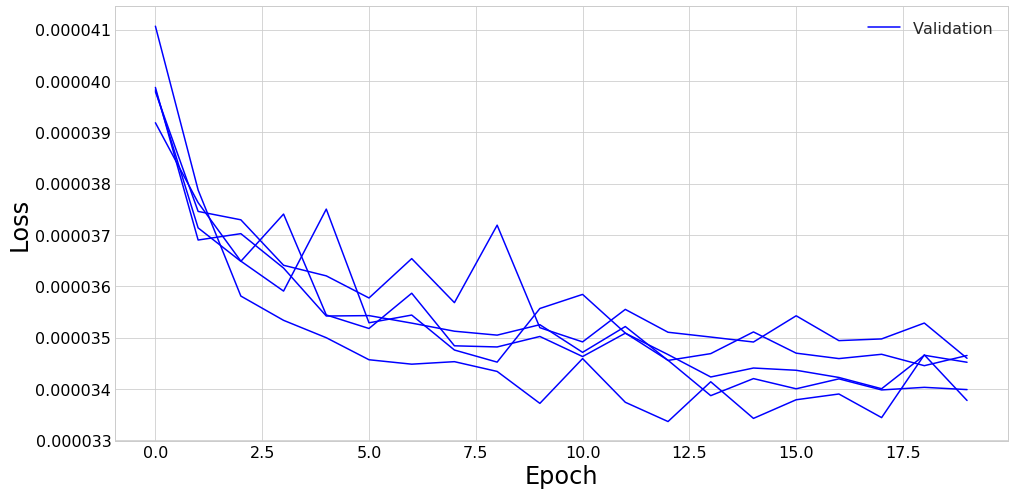

Mean loss = 3.41e-05 +- 2e-07
Mean wAUC = 0.0725 +- 0.0008
Mean AUC = 0.118 +- 0.001
Mean AMS = 3.26 +- 0.06
Mean cut = 0.943 +- 0.007
______________________________________



In [6]:
results2, histories2 = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':1e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          patience=patience, verbose=0, amsSize=250000)

Training using weights
Running fold 1 / 5
2 classes found, running in binary mode

Score is: {'loss': 0.000805864480346866, 'wAUC': 0.5, 'AUC': 0.5, 'AMS': 1.0799023711134421, 'cut': 0.0}
Fold took 21.630s

Running fold 2 / 5
Score is: {'loss': 0.0007970793817441093, 'wAUC': 0.5, 'AUC': 0.5, 'AMS': 1.0800492734714409, 'cut': 1.0}
Fold took 20.314s

Running fold 3 / 5
Score is: {'loss': 0.0007970793786590958, 'wAUC': 0.5, 'AUC': 0.5, 'AMS': 1.0634655943439617, 'cut': 1.0}
Fold took 18.635s

Running fold 4 / 5
Score is: {'loss': 0.0008059047886403277, 'wAUC': 0.5, 'AUC': 0.5, 'AMS': 1.0661052183512052, 'cut': 0.0}
Fold took 17.455s

Running fold 5 / 5
Score is: {'loss': 0.0008059047810151242, 'wAUC': 0.5, 'AUC': 0.5, 'AMS': 1.0804072651729506, 'cut': 0.0}
Fold took 19.739s


______________________________________
Training finished
Cross-validation took 99.204s 


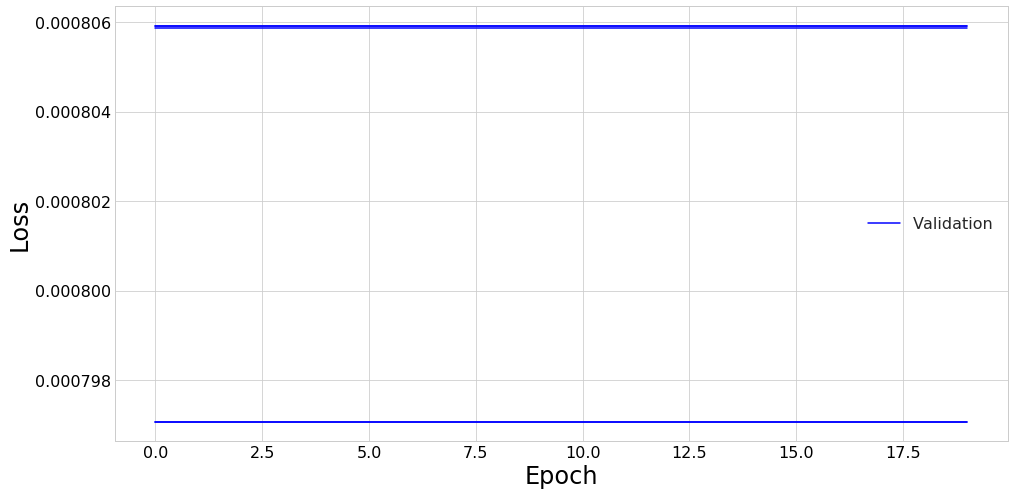

Mean loss = 0.000802 +- 2e-06
Mean wAUC = 0.5 +- 0.0
Mean AUC = 0.5 +- 0.0
Mean AMS = 1.074 +- 0.003
Mean cut = 0.4 +- 0.2
______________________________________



In [7]:
results3, histories3 = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':1e-1 }},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          patience=patience, verbose=0, amsSize=250000)

An LR of 1e-1 is too large to train; loss doesn't decrease. 1e-5 is too small to converge quickly; loss is slow to decrease. 1e-3, however appears to learn quickly.

# Using LR range test

The LR range test ([L. Smith, 2017](https://arxiv.org/abs/1506.01186)) may be used to quickly find the optimal learning rate for a particuar architecture and dataset.

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 20.300s 


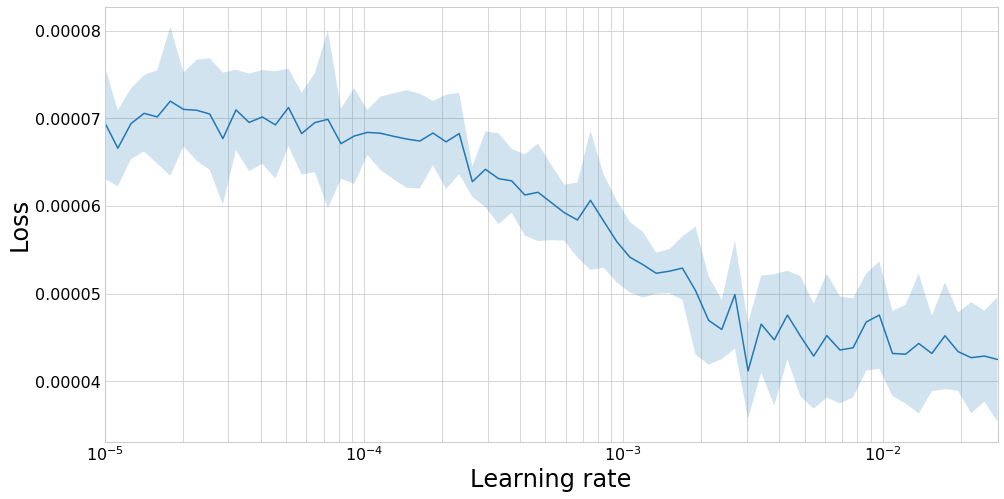

______________________________________



In [8]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

We want to pick the largest LR for which the network can train (loss decreases). At 1e-3, the network is still learning, but at somepoint afterwards the training begins to stall, and the loss plateues (and will eventually diverge). Therefore we can easily use the LR finder to get optimal LR for our setup.